# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from string import punctuation
# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS 

#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Loading the data

In [2]:
data = pd.read_excel('mentalset.xlsx')

In [3]:
data.columns

Index(['compound', 'doctor_prescribed', 'patient_feel', 'suv4', 'suv8',
       'suv11', 'suv12', 'suv13', 'suv14', 'year_study', 'course',
       'level_total_all', 'level_total_r'],
      dtype='object')

In [4]:
data.head()

,compound,doctor_prescribed,patient_feel,suv4,suv8,suv11,suv12,suv13,suv14,year_study,course,level_total_all,level_total_r
0,-0.0844,depression,[],"Depression, Depression â May 2015 started on...","Yes, Yes - 1 year ago. Thoughts come and go",Feel emotionally unstable and have suffered li...,So I can stay at university. Help me to change...,Keep on making the same mistakes over and over...,no infom,2,Criminal Investigation with Psychology,50,8
1,-0.9751,NaN,['anxiety'],no message,No,Anxiety issues getting out of control. Recentl...,Seeing life differently and can't enjoy any da...,Some sort of peace of mind and to assure mysel...,no infom,3,Business Management,33,1
2,-0.9970,NaN,['anxiety'],no message,No,I have bad anxiety primarily about hygiene but...,I obsessively wash my hands and/or get upset/s...,I would like to day to day be able to handle m...,no infom,1,Film production,16,0
3,-0.8079,NaN,[],no message,2016 on a frequent basis for 3 months,"I feel empty, loss and have no one to turn to.","It hasn't, since it was through summer.","I don't feel like myself, I just want to be my...",no infom,3,Football Studies,43,5
4,-0.6249,NaN,['anxiety'],no,feeling extremely anxious all the time,NaN,NaN,NaN,Stop my anxiety,3,fashion styling and creative direction,37,0


# Data Preprocessing and Visualization

## Visualization

### Single Variate Analysis

<AxesSubplot:xlabel='course', ylabel='count'>

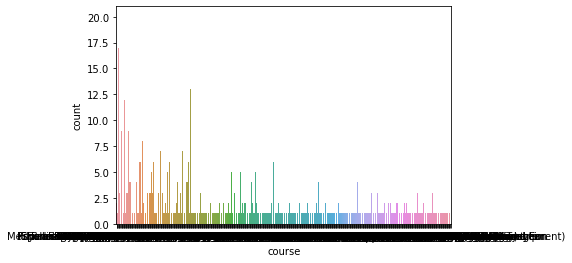

In [5]:
sns.countplot(x="course", data=data.dropna())

<AxesSubplot:xlabel='level_total_all', ylabel='count'>

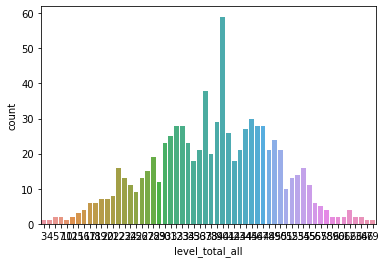

In [6]:
sns.countplot(x='level_total_all', data=data.dropna())

### Text Analysis

In [7]:
text = data['suv8'][0] + data['suv11'][1] + data['suv12'][2] + data['suv13'][3] + data['suv14'][5]

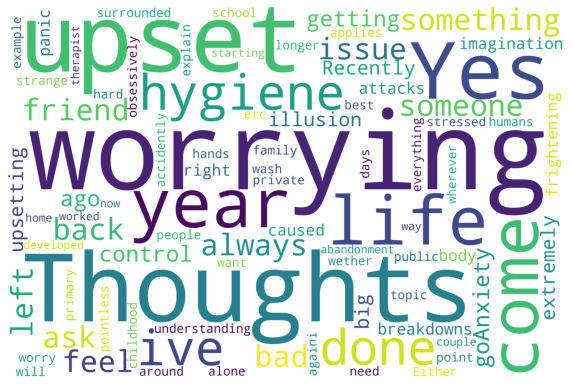

In [8]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(10, 10))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()

### Multivariate Analysis

<AxesSubplot:>

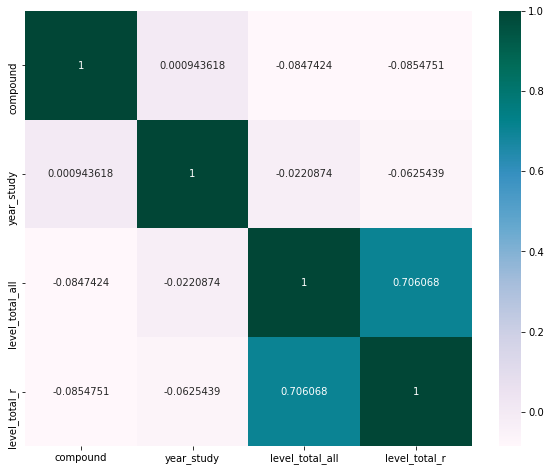

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='PuBuGn',fmt='g',annot=True)

## Data Preprocessing

In [10]:
### Checking categories in target column
data['doctor_prescribed'].value_counts().index

Index(['depression', 'anxiety', 'anorexia', 'ptsd', 'adhd', 'ocd', 'bpd',
       'autism', 'trichotillomania', 'bipolar', ' anxiety', 'eupd', 'bipolar ',
       'stress', 'schizophrenia', 'ptsd ', 'adhd ', 'phobia', 'psychosis',
       ' depression', 'anger', ' adhd', 'bdp',
       'depression, anxiety, bipolar, bipolar', 'psychotic', 'borderline',
       'anorexia '],
      dtype='object')

In [11]:
### Assigning all categories to their relative categories with some correction with their spellings , names, etc.

In [12]:
data.loc[data['doctor_prescribed'] == 'ptsd','doctor_prescribed'] = 'pstd'
    
data.loc[data['doctor_prescribed'] == 'trichotillomania','doctor_prescribed'] = 'anorexia'
    
data.loc[data['doctor_prescribed'] == ' anxiety','doctor_prescribed'] = 'anxiety'
    
data.loc[data['doctor_prescribed'] == 'eupd','doctor_prescribed'] = 'bpd'
    
data.loc[data['doctor_prescribed'] == 'bipolar ','doctor_prescribed'] = 'bipolar'
    
data.loc[data['doctor_prescribed'] == 'stress','doctor_prescribed'] = 'anxiety'
    
data.loc[data['doctor_prescribed'] == 'psychosis','doctor_prescribed'] = 'depression'
    
data.loc[data['doctor_prescribed'] == 'schizophrenia','doctor_prescribed'] = 'depression'
    
data.loc[data['doctor_prescribed'] == 'ptsd ','doctor_prescribed'] = 'pstd'
    
data.loc[data['doctor_prescribed'] == 'adhd ','doctor_prescribed'] = 'adhd'
    
data.loc[data['doctor_prescribed'] == 'phobia','doctor_prescribed'] = 'anorexia'
    
data.loc[data['doctor_prescribed'] == ' depression','doctor_prescribed'] = 'depression'
    
data.loc[data['doctor_prescribed'] == 'psychotic','doctor_prescribed'] = 'depression'
    
data.loc[data['doctor_prescribed'] == 'anorexia ','doctor_prescribed'] = 'anorexia'
    
data.loc[data['doctor_prescribed'] == 'bdp','doctor_prescribed'] = 'bpd'
    
data.loc[data['doctor_prescribed'] == ' adhd','doctor_prescribed'] = 'adhd'
    
data.loc[data['doctor_prescribed'] == 'borderline','doctor_prescribed'] = 'bpd'
    
data.loc[data['doctor_prescribed'] == 'autism','doctor_prescribed'] = 'social anxiety'
    
data.loc[data['doctor_prescribed'] == 'anger','doctor_prescribed'] = 'agoraphobia'
    
    

In [13]:
### Again checking value counts of categories of target column
data['doctor_prescribed'].value_counts()

depression                               661
anxiety                                  485
anorexia                                 109
pstd                                      50
adhd                                      44
bpd                                       37
ocd                                       30
social anxiety                            16
bipolar                                   12
depression, anxiety, bipolar, bipolar      1
agoraphobia                                1
Name: doctor_prescribed, dtype: int64

In [14]:
### Dropping unnecessary and redundant data
data.drop(['suv4','compound','patient_feel','year_study','course','level_total_all','level_total_r'],axis=1,inplace=True)

In [15]:
### Null values in the data
data.isnull().sum()

doctor_prescribed    2094
suv8                  154
suv11                 295
suv12                1817
suv13                1801
suv14                   0
dtype: int64

In [16]:
### Dropping all null values

In [17]:
df = data[data['doctor_prescribed'].notna()]
len(df)

1446

In [18]:
### Filling all null values of survey columns with empty strings to avoid losing data of other columns for same index
df_m = df.replace(np.nan,'',regex=True)

In [19]:
### Combining all survey columns separated by a comma
df_m1 = pd.DataFrame(df_m[['suv8','suv11','suv12','suv13','suv14']].agg(','.join,axis=1))

In [20]:
### Concatenating again 
df_m2 = pd.concat([df_m['doctor_prescribed'],df_m1],axis=1)

In [21]:
df_m2.head()

,doctor_prescribed,0
0,depression,"Yes, Yes - 1 year ago. Thoughts come and go,Fe..."
6,anorexia,"anxiety and panic attacks \nnervous breakdown,..."
7,depression,starting to go downhill and feeling really los...
8,depression,I suffer from severe anxiety issues which caus...
9,anxiety,"Yes, SUICIDAL THOUGHTS 2008 - 2013,I'm experie..."


In [27]:
### Replacing names 
df_m2.columns = ['conditions','symptoms']
df_m2['symptoms'].to_csv('symptoms.csv')

In [23]:
df_m2.reset_index(drop=True,inplace=True)

In [24]:
df1 = pd.read_excel('NLP set.xlsx', 'symptoms')
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'NLP set.xlsx'

In [92]:
### Appending category = 'agoraphobia' as it has only 1 value counts
### Otherwise we can't use balancing technqiue for target variable

In [93]:
df_m3 = pd.concat([df_m2,df_m2[df_m2['conditions'] == 'agoraphobia']], ignore_index = True, axis = 0)

In [94]:
df_m3 = pd.concat([df_m3,df_m2[df_m2['conditions'] == 'agoraphobia']], ignore_index = True, axis = 0)

In [95]:
df_m4 = pd.concat([df_m3,df_m3[df_m3['conditions'] == 'agoraphobia']], ignore_index = True, axis = 0)

In [96]:
### Now value counts for agoraphobia has been increased

In [97]:
pd.DataFrame(df_m4['conditions'].value_counts())

,conditions
depression,661
anxiety,485
anorexia,109
pstd,50
adhd,44
bpd,37
ocd,30
social anxiety,16
bipolar,12
agoraphobia,6


In [98]:
### Dropping uncertain value
df_m4 = df_m4[df_m4['conditions'] != 'depression, anxiety, bipolar, bipolar']

In [99]:
df_m4.reset_index(drop=True,inplace=True)

In [100]:
### Adding medical proven symptoms randomly to main set symptoms to avoid overfitting and data leakage and to make model more reliable

In [101]:
for i in range(0,len(df_m4),np.random.choice(range(1,10))):
    
    if df_m4['conditions'][i] =='depression':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][0]
        
    elif df_m4['conditions'][i] =='anxiety':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][1]
        
    elif df_m4['conditions'][i] =='panic':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][2]
        
    elif df_m4['conditions'][i] =='social anxiety':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][3]
        
    elif df_m4['conditions'][i] =='agoraphobia':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][4]
        
    elif df_m4['conditions'][i] =='adhd':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][5]
        
    elif df_m4['conditions'][i] =='bpd':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][6]
        
    elif df_m4['conditions'][i] =='pstd':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][7]
        
    elif df_m4['conditions'][i] =='ocd':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][8]
        
    elif df_m4['conditions'][i] =='anorexia':
        df_m4['symptoms'][i] =  df_m4['symptoms'][i] + df1['symptoms'][9]

# Splitting data into X,y variables

In [102]:
X,y = df_m4['symptoms'],df_m4['conditions']

# Label Encoding of target variable

In [103]:
le = LabelEncoder()
y = le.fit_transform(y)

In [104]:
### Listing all value counts of target variable

In [105]:
for i in range(10):
    print('Count for class {0} : {1}'.format(i,list(y).count(i)))

Count for class 0 : 44
Count for class 1 : 6
Count for class 2 : 109
Count for class 3 : 485
Count for class 4 : 12
Count for class 5 : 37
Count for class 6 : 661
Count for class 7 : 30
Count for class 8 : 50
Count for class 9 : 16


# Text Data Cleaning

In [106]:
### Preprocessing text data to get clean data without digits , extra spaces , special characters , etc.
### Then lemmatizing all words to get their base name to get more clean data

In [107]:
stemmer = WordNetLemmatizer()

def data_cleaning(X):
    documents = []


    for sen in range(0, len(X)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))
    
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
        document = re.sub("(\s\d+)","",document) 
    
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
    
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
    
        # Converting to Lowercase
        document = document.lower()
    
        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
    
        documents.append(document)
    return documents

In [108]:
documents = data_cleaning(X)

In [109]:
len(documents)

1450

# Converting Independent variable to numerical vectorization

In [110]:
### Vectorizing text data using term frequency IDF technique
### Using max features as 2000 (randomly chosen)
### Stopping all stopwords like noun,pronoun,etc.

In [111]:
tfidfconverter = TfidfVectorizer(max_features=2000,lowercase=True, stop_words=stopwords.words('english'))
X = pd.DataFrame(tfidfconverter.fit_transform(documents).toarray())

# Balancing target variable categories

In [112]:
### Using Synthetic Minority Over-sampling Technique, we are oversampling all minority classes 
### Taking minority class as their minimum value counts starting from k_neighbors=4

In [113]:
# Implementing Oversampling for Handling Imbalanced 

oversample = SMOTE(k_neighbors=4,n_jobs=-1,random_state=0)
X_res, y_res = oversample.fit_resample(X, y)

In [114]:
X_res.shape, y_res.shape

((6610, 2000), (6610,))

# Splitting data into training and testing

In [115]:
### Keeping test data size 30% of total data
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=0)

# Model Building

## Decision Tree classifier

In [116]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
y_pred = DT.predict(X_test)

## Evaluation

In [118]:
train_score = DT.score(X_train,y_train)
test_score = DT.score(X_test,y_test)
print('Training Score : {}'.format(train_score))
print('Testing Score : {}'.format(test_score))

Training Score : 0.9967581586341042
Testing Score : 0.8749369641956631


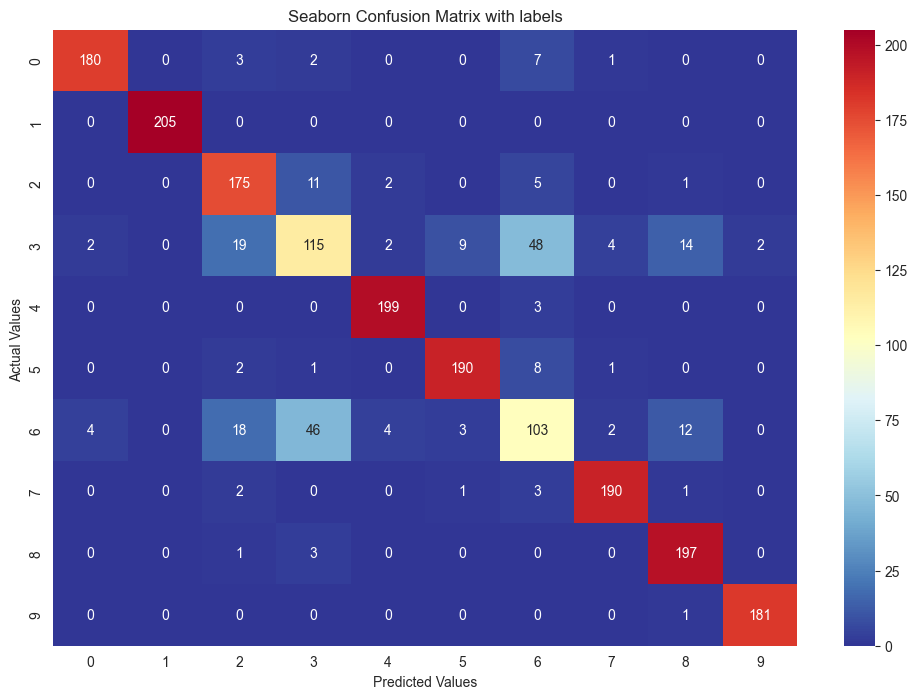

In [119]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='RdYlBu_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

<AxesSubplot:>

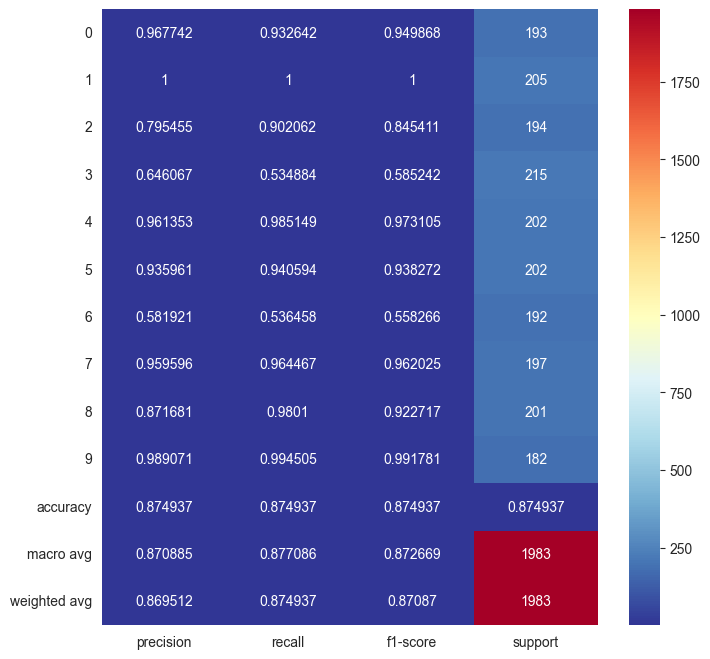

In [120]:
plt.figure(figsize=(8,8))
report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1,2,3,4,5,6,7,8,9],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(report).T, annot=True,cmap='RdYlBu_r', fmt='g')

## Random Forest Classifier

In [121]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
y_pred = RF.predict(X_test)

## Evaluation

In [123]:
train_score = RF.score(X_train,y_train)
test_score = RF.score(X_test,y_test)
print('Training Score : {}'.format(train_score))
print('Testing Score : {}'.format(test_score))

Training Score : 0.9967581586341042
Testing Score : 0.9314170448814927


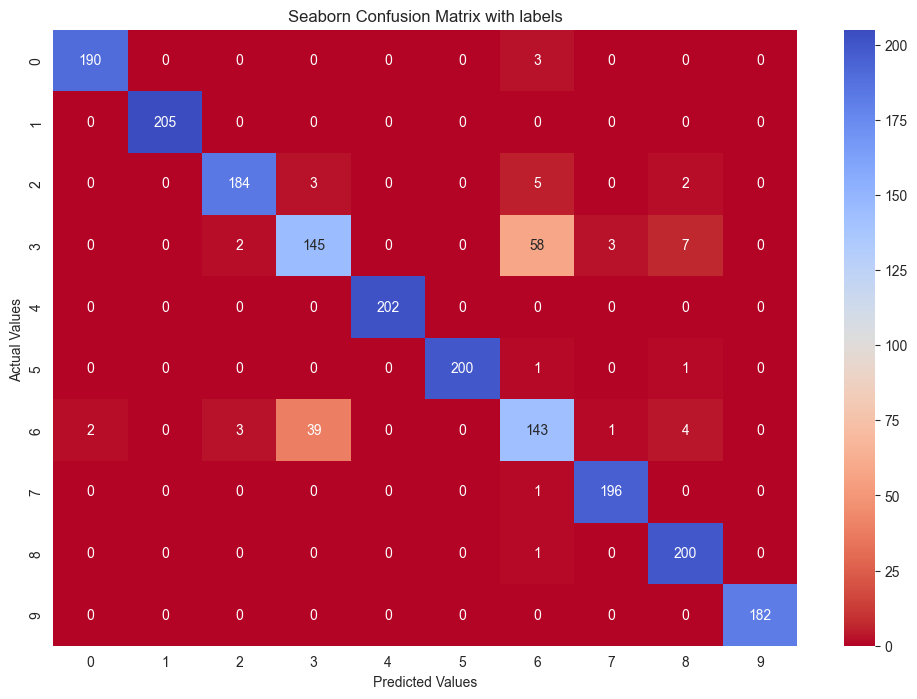

In [124]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='coolwarm_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

<AxesSubplot:>

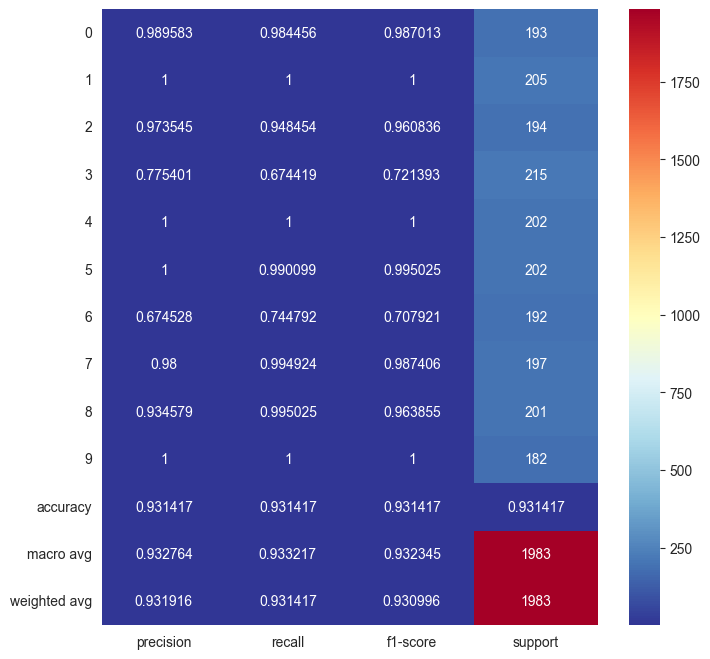

In [125]:
plt.figure(figsize=(8,8))
report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1,2,3,4,5,6,7,8,9],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(report).T, annot=True,cmap='RdYlBu_r', fmt='g')

## Gradient Boosting Classifier

In [126]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [127]:
y_pred = GB.predict(X_test)

In [128]:
train_score = GB.score(X_train,y_train)
test_score = GB.score(X_test,y_test)
print('Training Score : {}'.format(train_score))
print('Testing Score : {}'.format(test_score))

Training Score : 0.9868165117786903
Testing Score : 0.908219868885527


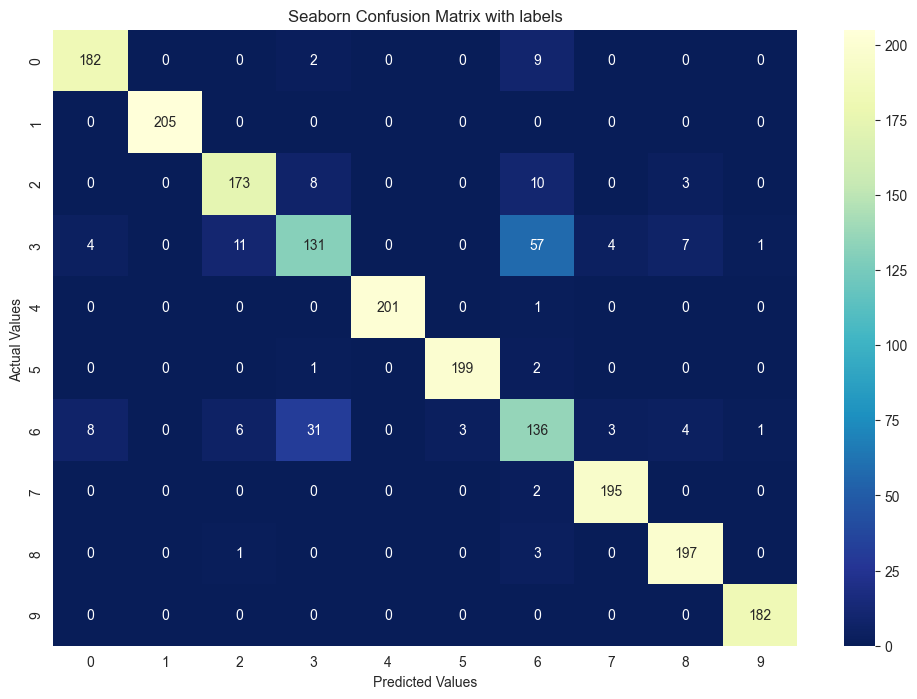

In [129]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu_r', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

<AxesSubplot:>

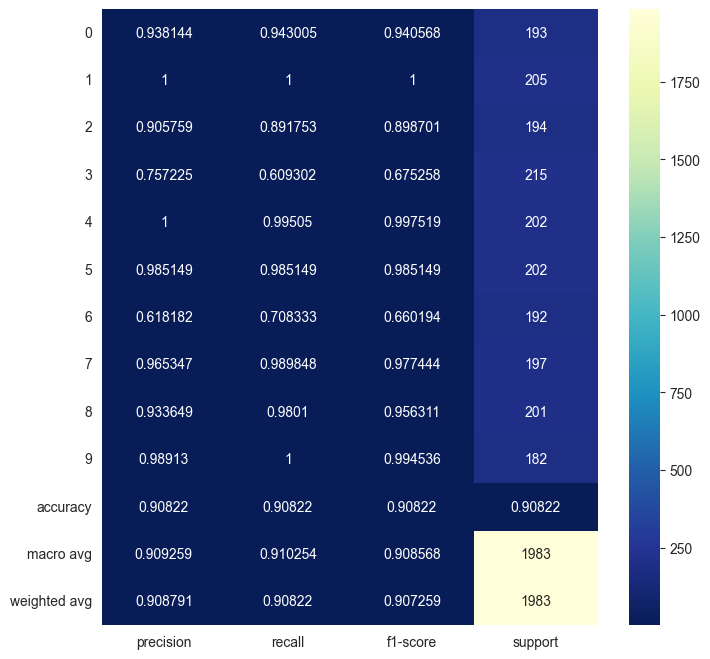

In [130]:
plt.figure(figsize=(8,8))
report = classification_report(y_test,
                                   y_pred,
                                   target_names=[0,1,2,3,4,5,6,7,8,9],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(report).T, annot=True,cmap='YlGnBu_r', fmt='g')

In [131]:
model1 = []
for model in [DT,RF,GB]:
      model1.append(model.score(X_test,y_test))
model_score = pd.DataFrame(model1,columns=['accuracy'],index= ['Decision_tree','RandomForest','GradientBoosting'])
model_score

,accuracy
Decision_tree,0.874937
RandomForest,0.931417
GradientBoosting,0.908220


In [132]:
#Save RF MODEL
model_RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
model_RF= model_RF.fit(X_test , y_test)
model_RF

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

In [133]:
import pickle

#Saving the best model
pickle.dump(model_RF, open('model_RF.pkl', 'wb'))

# Prediction on New Data 

Here we are taking random data from the data available to us for experiment purposes.

In [134]:
Index = np.random.randint(0,len(df_m4),size=4)
Index

array([ 393,  777, 1370,  123])

In [135]:
new_X = []
for i in range(len(Index)):
    New_data = df_m4['symptoms'][i]
    
    new_X.append(New_data)
    
# Data Cleaning
new_X = data_cleaning(new_X)
    
# Text Vectorization
new_X = tfidfconverter.transform(new_X).toarray()

for i in range(len(new_X)):
    
    # Prediction using best Random Forest Model
    Predict = RF.predict(new_X[i].reshape(1,-1))
    Predicted = le.classes_[Predict]
    True_class = df_m4['conditions'][i]
    print('True Class is {0} and Predicted : {1}'.format(True_class,Predicted))

True Class is depression and Predicted : ['depression']
True Class is anorexia and Predicted : ['anxiety']
True Class is depression and Predicted : ['depression']
True Class is depression and Predicted : ['depression']


Hence, it predicted 4 out of 4  correctly.